In [1]:
import numpy as np
from ase.io import read, write
from ase import Atoms
from ase.spacegroup.symmetrize import FixSymmetry
from calorine.calculators import CPUNEP
from calorine.tools import get_force_constants, relax_structure
from pandas import DataFrame
from phonopy.units import THzToCm
from seekpath import get_explicit_k_path
import phonopy
from ase.constraints import UnitCellFilter
from ase.optimize import BFGS
from matplotlib import pyplot as plt

In [2]:
def get_structure(phonon):
    structure_ph = phonon.primitive
    structure_ase = Atoms(symbols=structure_ph.symbols, cell=structure_ph.cell,
                          scaled_positions=structure_ph.scaled_positions, pbc=True)
    return structure_ase

# Pnma

### NEP setup  

In [3]:
structure = read('BaZrS3-spg62-Pnma.xyz')
calculator = CPUNEP('nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0001)

phonon = get_force_constants(structure, calculator, [2, 2, 2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)
path = get_explicit_k_path(structure_tuple)
phonon.run_band_structure([path['explicit_kpoints_rel']])
band = phonon.get_band_structure_dict()
df = DataFrame(band['frequencies'][0])
df.index = path['explicit_kpoints_linearcoord']

### DFT setup 

In [4]:
phonon_DFT = phonopy.load("DFT_BaZrS3_tilt_62.yaml")
phonon_DFT.run_band_structure([path['explicit_kpoints_rel']])
band_DFT = phonon_DFT.get_band_structure_dict()
df_DFT = DataFrame(band_DFT['frequencies'][0])
df_DFT.index = path['explicit_kpoints_linearcoord']

### Plot

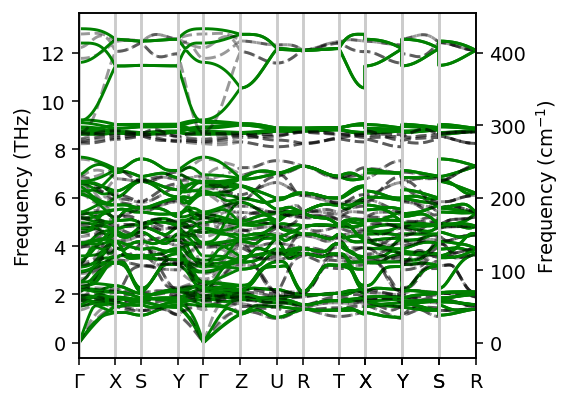

In [5]:
fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)

for col in df.columns:
    ax.plot(df_DFT.index, df_DFT[col], color='black', alpha = 0.4, linestyle='--')
    ax.plot(df.index, df[col], color='green')
ax.set_xlim(df.index.min(), df.index.max())

ax.set_ylabel('Frequency (THz)')
ax2 = ax.twinx()
ax2.set_ylabel('Frequency (cm$^{-1}$)')
ax2.set_ylim(THzToCm * np.array(ax.get_ylim()))

# beautify the labels on the x-axis
labels = path['explicit_kpoints_labels']
labels = ['$\Gamma$' if m == 'GAMMA' else m for m in labels]
labels = [m.replace('_', '$_') + '$' if '_' in m else m for m in labels]
df_path = DataFrame(dict(labels=labels,
                         positions=path['explicit_kpoints_linearcoord']))
df_path.drop(df_path.index[df_path.labels == ''], axis=0, inplace=True)
ax.set_xticks(df_path.positions)
ax.set_xticklabels(df_path.labels)
for xp in df_path.positions:
    ax.axvline(xp, color='0.8')

plt.tight_layout()

# I4/mcm

In [6]:
structure = read('BaZrS3-spg140-I4mcm.xyz')
calculator = CPUNEP('nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.000001, constant_cell = True)

phonon = get_force_constants(structure, calculator, [4,4,4])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)
path = get_explicit_k_path(structure_tuple)
phonon.run_band_structure([path['explicit_kpoints_rel']])
band = phonon.get_band_structure_dict()
df = DataFrame(band['frequencies'][0])
df.index = path['explicit_kpoints_linearcoord']

In [7]:
phonon_DFT = phonopy.load("DFT_BaZrS3_tilt_140.yaml")
phonon_DFT.run_band_structure([path['explicit_kpoints_rel']])
band_DFT = phonon_DFT.get_band_structure_dict()
df_DFT = DataFrame(band_DFT['frequencies'][0])
df_DFT.index = path['explicit_kpoints_linearcoord']

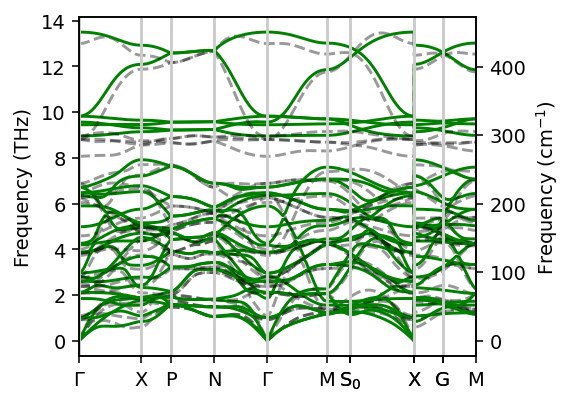

In [8]:
fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)

for col in df.columns:
    ax.plot(df_DFT.index, df_DFT[col], color='black', alpha = 0.4, linestyle='--')
    ax.plot(df.index, df[col], color='green')
ax.set_xlim(df.index.min(), df.index.max())

ax.set_ylabel('Frequency (THz)')
ax2 = ax.twinx()
ax2.set_ylabel('Frequency (cm$^{-1}$)')
ax2.set_ylim(THzToCm * np.array(ax.get_ylim()))

# beautify the labels on the x-axis
labels = path['explicit_kpoints_labels']
labels = ['$\Gamma$' if m == 'GAMMA' else m for m in labels]
labels = [m.replace('_', '$_') + '$' if '_' in m else m for m in labels]
df_path = DataFrame(dict(labels=labels,
                         positions=path['explicit_kpoints_linearcoord']))
df_path.drop(df_path.index[df_path.labels == ''], axis=0, inplace=True)
ax.set_xticks(df_path.positions)
ax.set_xticklabels(df_path.labels)
for xp in df_path.positions:
    ax.axvline(xp, color='0.8')

plt.tight_layout()

# Pm-3m 

In [9]:
structure = read('geometry.in')
calculator = CPUNEP('nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0000001, constant_cell=True)

phonon = get_force_constants(structure, calculator, [4,4,4])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)
path = get_explicit_k_path(structure_tuple)
phonon.run_band_structure([path['explicit_kpoints_rel']])
band = phonon.get_band_structure_dict()
df = DataFrame(band['frequencies'][0])
df.index = path['explicit_kpoints_linearcoord']

In [10]:
phonon_DFT = phonopy.load("DFT_BaZrS3_tilt_221.yaml")
phonon_DFT.run_band_structure([path['explicit_kpoints_rel']])
band_DFT = phonon_DFT.get_band_structure_dict()
df_DFT = DataFrame(band_DFT['frequencies'][0])
df_DFT.index = path['explicit_kpoints_linearcoord']

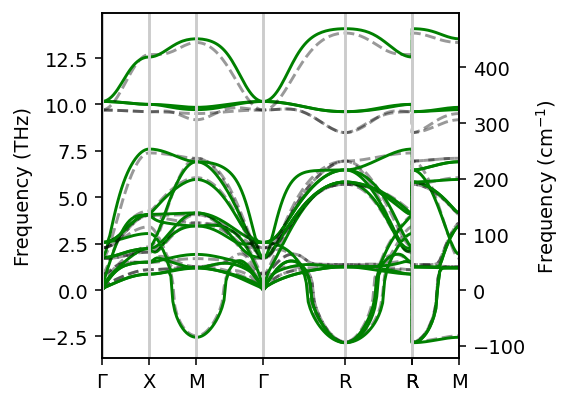

In [11]:
fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)

for col in df.columns:
    ax.plot(df_DFT.index, df_DFT[col], color='black', alpha = 0.4, linestyle='--')
    ax.plot(df.index, df[col], color='green')
ax.set_xlim(df.index.min(), df.index.max())

ax.set_ylabel('Frequency (THz)')
ax2 = ax.twinx()
ax2.set_ylabel('Frequency (cm$^{-1}$)')
ax2.set_ylim(THzToCm * np.array(ax.get_ylim()))

# beautify the labels on the x-axis
labels = path['explicit_kpoints_labels']
labels = ['$\Gamma$' if m == 'GAMMA' else m for m in labels]
labels = [m.replace('_', '$_') + '$' if '_' in m else m for m in labels]
df_path = DataFrame(dict(labels=labels,
                         positions=path['explicit_kpoints_linearcoord']))
df_path.drop(df_path.index[df_path.labels == ''], axis=0, inplace=True)
ax.set_xticks(df_path.positions)
ax.set_xticklabels(df_path.labels)
for xp in df_path.positions:
    ax.axvline(xp, color='0.8')

plt.tight_layout()